# Lab 3 \- Answering questions with regression versus classification \(Rahul Arora \+ Zackery Huang\)

## Goals of this lab:

  - Reviewing regression methods
  - Applying classification methods from sklearn
 - Practicing recoding variables
  - Comparing performance across different model classes

## Recall/prereqs:

 - calling regression functions
 - basic plotting



In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split

import pandas as pd
import seaborn as sns
sns.set()

# Today: it's all about possums.

Today we're going to be learning about possums, which are marsupials from Australia. Note that these are different from opossums, which live in North America:

Possum: super cute, v friendly.

Opossum: very scary, 10/10 will bite.


In [3]:
possum_df = pd.read_csv('possum.csv')
possum_df.head()
print(possum_df.value_counts())

case  site  Pop    sex  age  hdlngth  skullw  totlngth  taill  footlgth  earconch  eye   chest  belly
1     1     Vic    m    8.0  94.1     60.4    89.0      36.0   74.5      54.5      15.2  28.0   36.0     1
68    5     other  m    5.0  94.1     56.0    88.5      38.0   65.9      43.1      17.4  27.0   30.0     1
78    6     other  m    1.0  86.5     51.0    81.0      36.5   63.0      44.3      13.2  23.0   28.0     1
77    6     other  m    6.0  93.6     56.2    84.0      36.0   62.8      42.9      16.2  25.0   35.0     1
76    6     other  m    5.0  92.4     56.8    89.0      41.0   64.5      46.4      17.8  26.0   33.0     1
                                                                                                        ..
32    1     Vic    f    4.0  94.3     56.7    94.0      39.0   74.8      52.0      14.9  28.0   34.0     1
31    1     Vic    m    3.0  92.8     54.1    93.0      37.0   68.0      52.5      14.5  27.0   31.0     1
30    1     Vic    f    2.0  92.1     54.4

# Today's task: predict the age of a possum.

Let's take a look at the distribution of ages, just to get a sense of how old a possum can get. Note: our ages seem to all be integers.

<AxesSubplot:xlabel='age', ylabel='Count'>

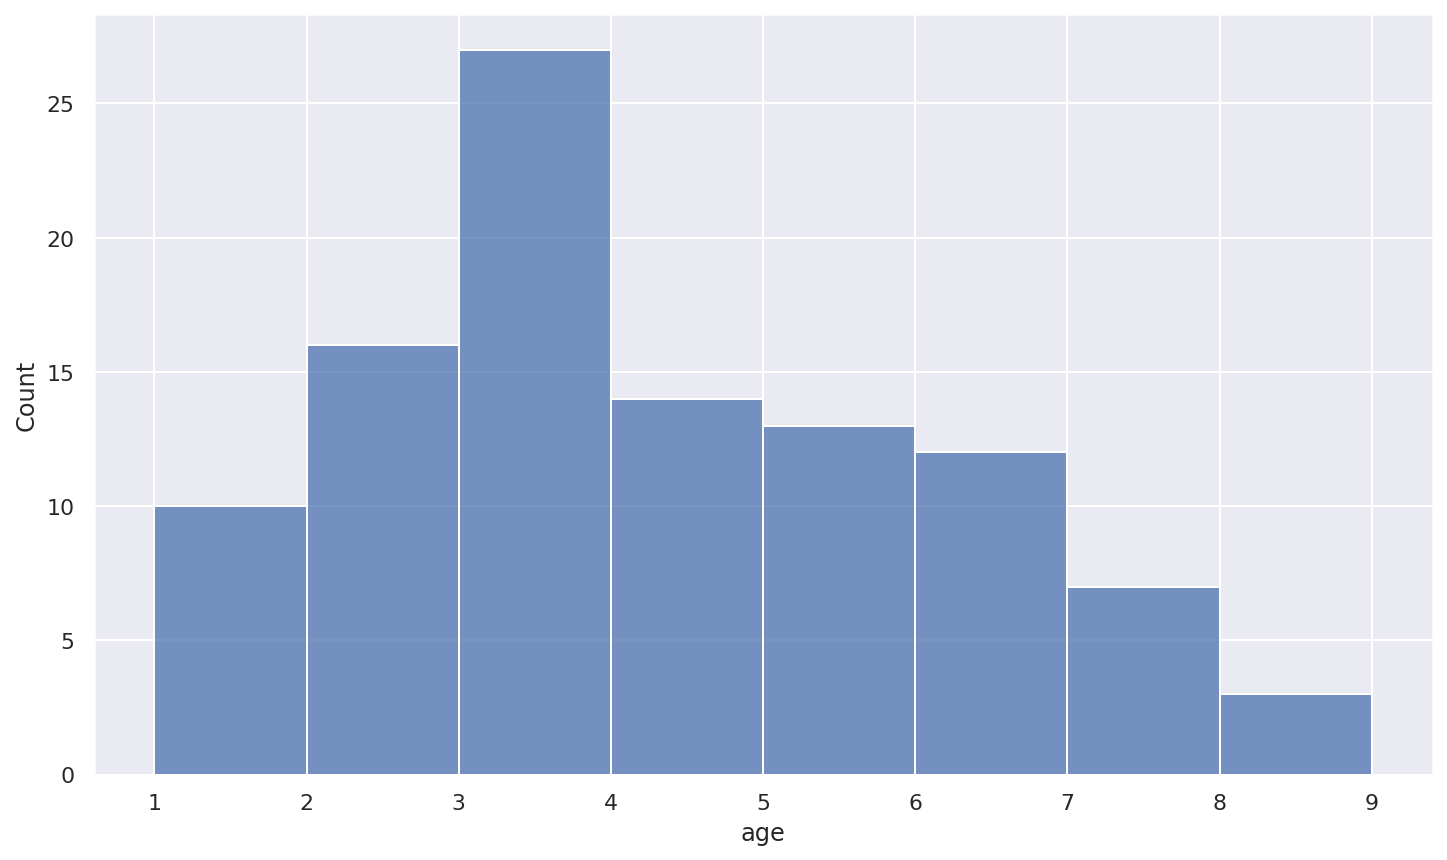

In [4]:
sns.histplot(data=possum_df,x='age')

# L3.1 Data Exploration

I got this dataset from kaggle: https://www.kaggle.com/datasets/abrambeyer/openintro-possum

#### (a) Understanding variables

Do we have any missing data? What do 'case', 'site', and 'pop' refer to? Are there any other variables whose names are confusing? If so, what are they?

- Yes, we have 2 null values for age, and 1 null value for foot length
- Case refers to the observation number, site refers to the site number where the possum was trapped, and pop refers to the population, either Victoria/other \(New South Wales or Queensland\). Variables: Hdlngth, skullw, and totlngth are also confusing names. Hdlngth is Head length, in mm, skullw is skull width, in mm, and totlngth is total length, in cm.

#### (b) Test your intuition.

We'll be trying to predict age. List 2 variables that you think should intuitively have a strong relationship with age. Create scatterplots to explore these relationships.

- We believe that two variables with a strong correlation to age are total length \(totlngth\) and skull width \(skullw\)

#### (c) Create train and test data

Split the possum data into train/test data using train_test_split. We'll be using these train/test datasets for the rest of the lab. Choose what fraction of the data you want to hold as test data, and set your_test_size equal to that fraction.



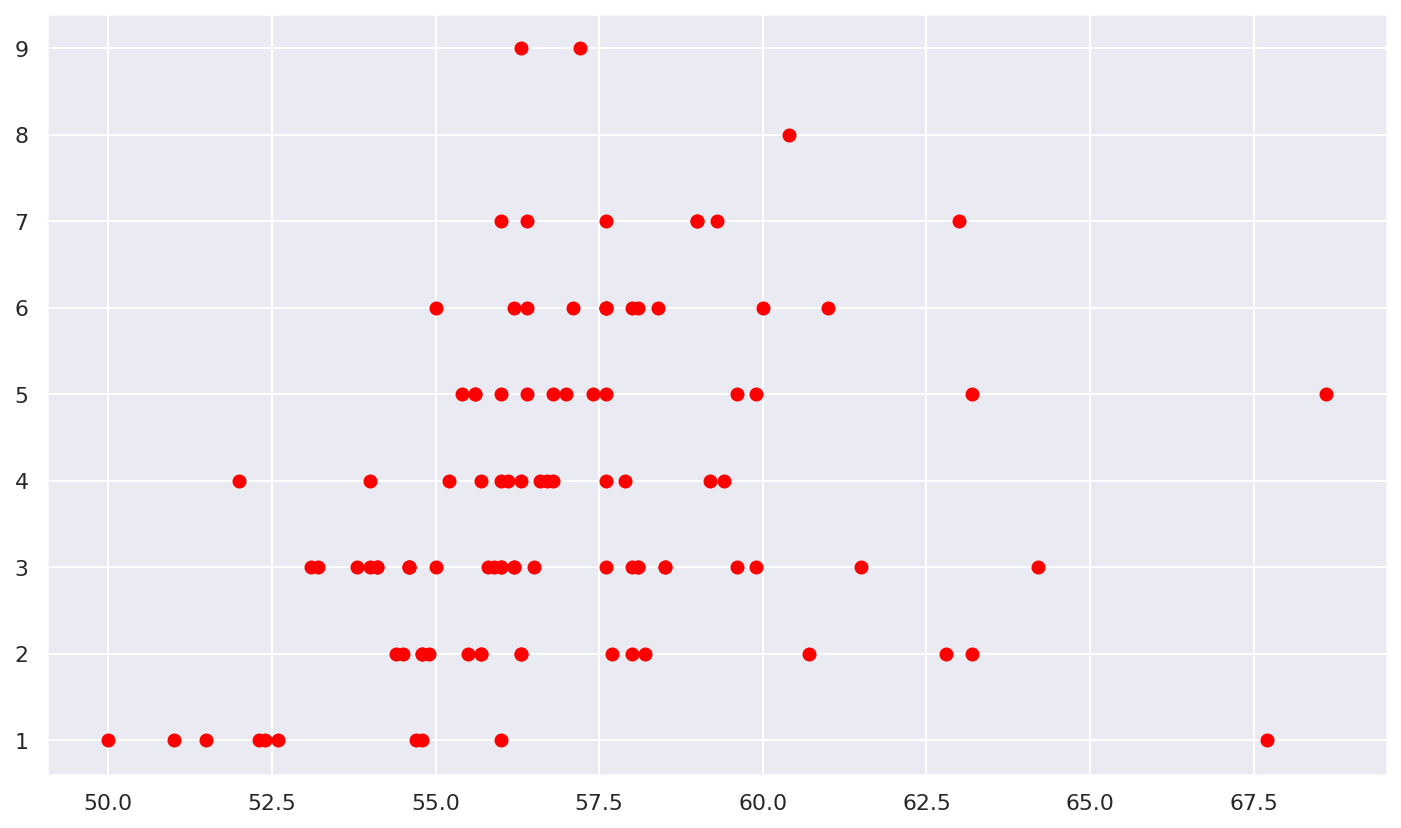

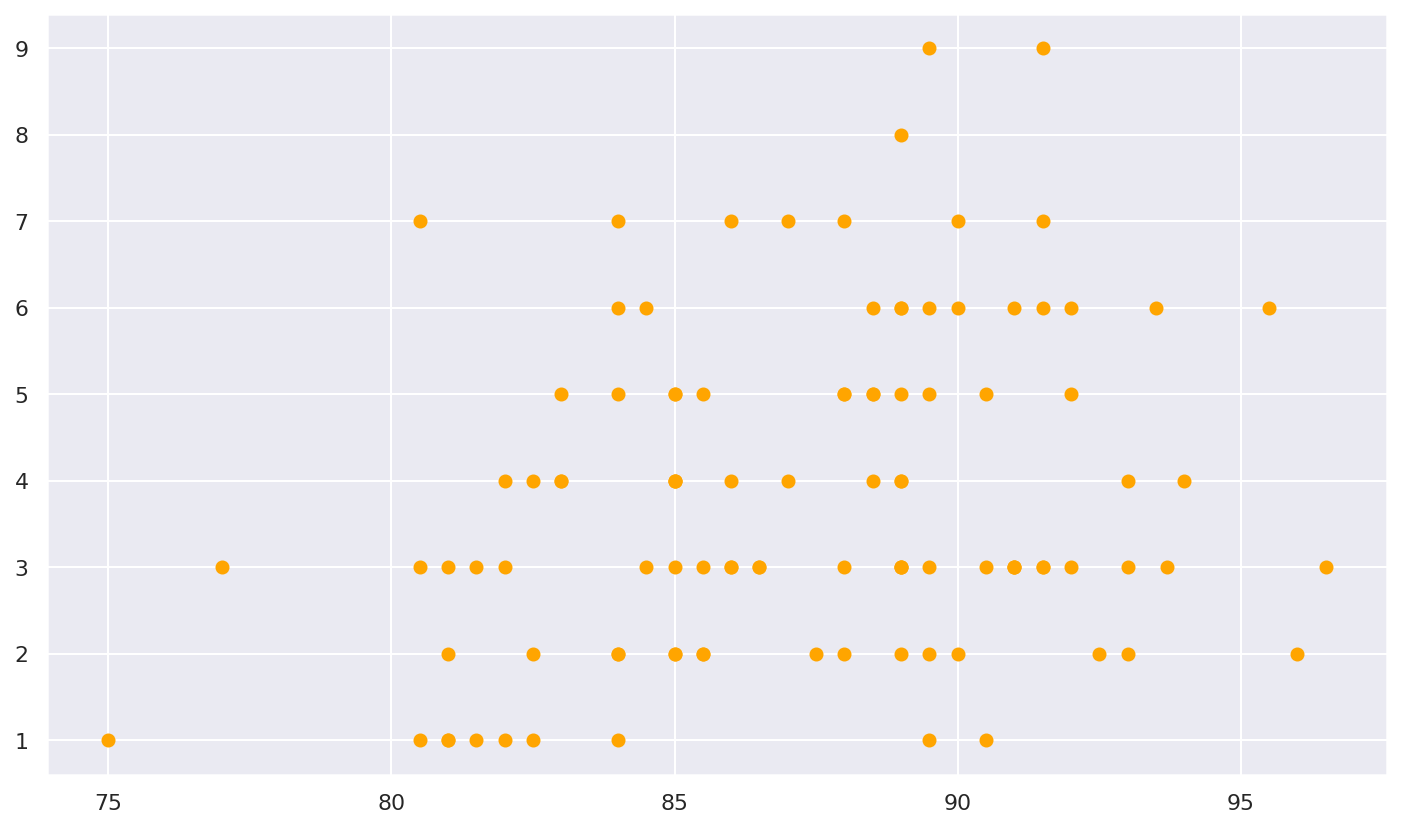

In [5]:
plt.scatter(possum_df.skullw, possum_df.age,color="red")
plt.show()
plt.scatter(possum_df.totlngth, possum_df.age, color = "orange")

In [139]:
# replace your_test_size with whatever fraction you want to keep for test data
your_test_size = 0.21
possum_df = possum_df.dropna()
x_train, x_test, y_train, y_test = train_test_split(possum_df[["skullw", "totlngth"]], possum_df.age, test_size = your_test_size)
possum_df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,life_stage
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0,elderly
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0,elderly
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0,elderly
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0,elderly
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0,adult


# L3.2 Age via regression

Age is a numeric value, so it should be clear how we can ask "how well can we predict age as a function."

#### (a) Pick a regression method.

We've previously used linear regression, multiple linear regression, and polynomial regression to try to model relationships. Which do you want to use for this task? Why?

Polynomial Regression because it is a type of predictive analysis that is flexibile and more easily finds a correlation on continuous data.

#### (b) Pick your variables.

Which variables will you use as input to your model? Do you want to use any of the categorical variables? How will you recode them? Provide a brief justification for the variables you want to use, either based on your intuition or based on trends in the data. Are any of these variables redundant/co-linear?

- We will input both total length and skill width into the model\- neither of which are categorical, so we do not need to recode
- We use these variables because generally, as animals age, their bodies \(including heads\) grow, and so we would expect their to be a positive correlation
  - The data justifies the claim that higher skull/total lengths are correlation with older animals
  - These variables are not co\-linear/redudant, however they definetely have their own correlation\- bigger body &lt;\-\-&gt; bigger body

#### (c) Fit your model

Fit your model to the training data, and asses its performance using the test data.

#### (d) Interpret your model

Discuss:

- How did your model do? Does this seem "good" or "bad"?
  - Our model did not perform as desired. It is bad due to the variety within the data and its inability to be categorize/associate all of the data on one line. The correlation found is much weaker than anticipated\- maybe due to other, non constant factors \(like gender\). 
- Does your model reflect anything about the data? Which variables seem to be "most important" when predicting age?
  - The model shows that there is a correlation between body size and age, however the correlation is not very direct. For istance, total length, skull width, head length, footlength, tail, etc., all have very important patterns, however, perhaps the total length variable is the "most important," due to its ability to capture all the length in one number 



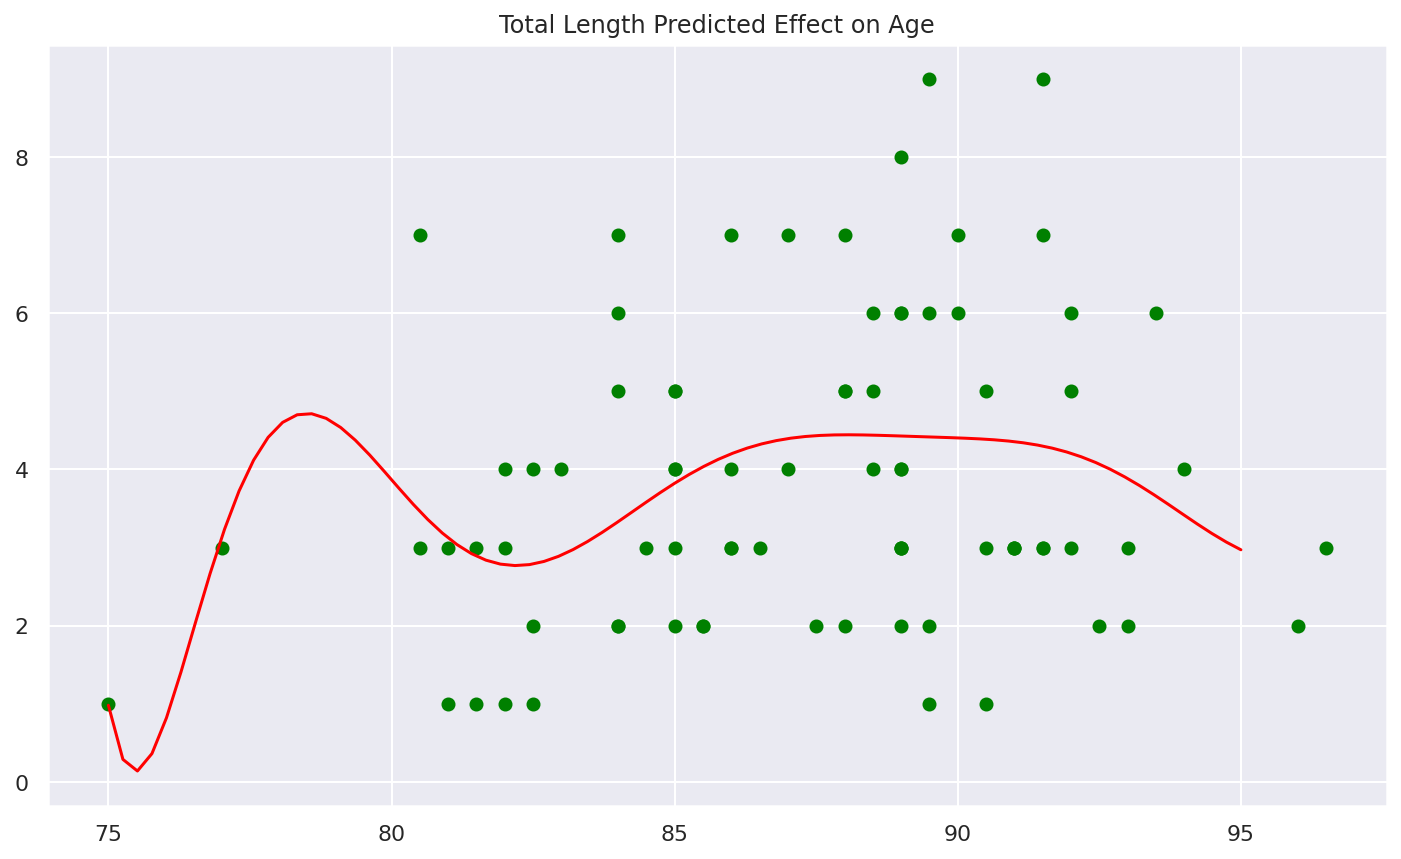

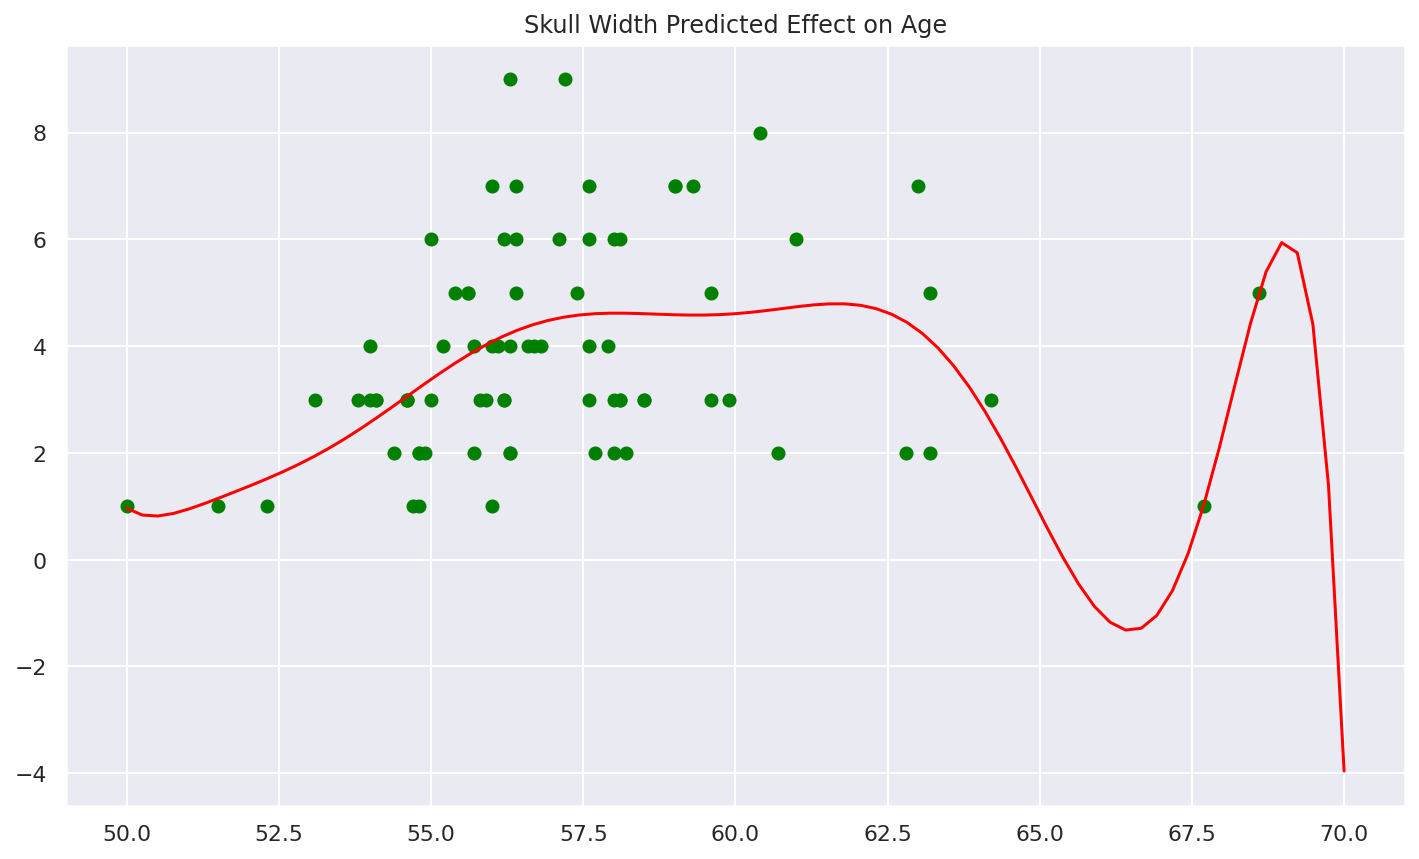

In [120]:
def best_poly(X, Y, k):
  
    #using np.polyfit.
    fit = np.polyfit(X,Y,k,full=True)
 
    
    #calculating coeffcieints
    p = fit[0]
   
    #calculating mse
    mse = (fit[1])

    return p, mse

def plot_poly_with_data(X, Y, k, plot_title):

    #What does p, _ mean? What is the line?
    p, _ = best_poly(X,Y,k) # compute the coefficients for the best polynomial
    #extract coefficients from p
    
    coefficients = np.poly1d(p)

    #points on the poly line of best fit
    if (plot_title == "Skull Width Predicted Effect on Age"):
        plt.plot(np.linspace(50,70, num = len(x_train)), coefficients(np.linspace(50,70, num=len(x_train))), color = "red")
    else:
        plt.plot(np.linspace(75,95, num = len(x_train)), coefficients(np.linspace(75,95, num=len(x_train))), color = "red")
    plt.title(plot_title)
    plt.scatter(X, y=Y, color="green")


plot_poly_with_data(x_train["totlngth"], y_train, 10, "Total Length Predicted Effect on Age")
plt.show()
plot_poly_with_data(x_train["skullw"], y_train, 10, "Skull Width Predicted Effect on Age")

# L3.3 Age via classification

An ecologist approaches you with a problem. They don't care about predicting the actual age-in-years that a possum is, but they're interested in what life stage it is in. There are three life stages of interest:

- juvenile: less than 2 years old
- adult: 2-5 years old
- elderly: 6+ years old

#### (a) Create a new variable

Create a new categorical variable, 'life\_stage', and for each possum record its life stage. \(answer below\)

#### (b) Pick a classification method

We've previously used decision trees, bagging, and boosting. If you'd like to use clustering, look up sklearn.neighbors.KNeighborsClassifier or sklearn.cluster.KMeans. Which will you pick for predicting life stage?

- Clustering

#### (c) Pick your variables.

Which variables will you use as input to your model? Provide a brief justification, either based on your intuition or based on trends in the data.

We decided to use all of the variables as the input to the model. The R2 score of the model scored a decently high R2 score at 0.71 so I think it works fine.

#### (d) Fit your model

Fit your model to the training data, and asses its performance using the test data. \(answer below\)

#### (e) Interpret your model

Discuss:

- How did your model do? Does this seem "good" or "bad"?
- Does your model reflect anything about the data? Which variables seem to be "most important" when predicting age?
- The model seemed to preform pretty well, scoring a high R2 score 0.71 without too much runtime. I think it seems "good"
- While we didn't use only a singular variable, I think it works better while using all the variables. We tried running it with only one variable and we got a lower score than using all of them.



In [217]:
#defining function
def stages(in_age):
    stage = ''
    if in_age < 2:
        stage = "juvenile"
    elif in_age <= 5 and 2 <= in_age:
        stage = "adult"
    else:
        stage = "elderly"
    return stage
from itertools import combinations
#new columns
possum_df["life_stage"] = possum_df["age"].apply(stages)
possum_df[["life_stage", "age"]]
x_train2, x_test2, y_train2, y_test2 = train_test_split(possum_df[["hdlngth", "skullw", "totlngth", "taill", "footlgth", "earconch", "eye", "chest", "belly"]], possum_df.life_stage, test_size = 0.2)
from sklearn.neighbors import KNeighborsClassifier

R2 = []
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train2, y_train2)
R2.append(neigh.score(x_test2, y_test2))
print(R2)


[0.7142857142857143]


# L3.4 Comparing: regression versus classification

We just trained a classifier to predict life stage, but consider: you already trained a regression model. In theory, you can predict life stage by

1. running your regression model
2. rounding your predicted age to an integer
3. predicting life stage according to which life stage your predicted age would fall into

e.g. if your regression model predicts that a particular possum is 2.31 years old, then we'll say that the corresponding life stage classification is 'adult'.

#### (a) Write a classification rule:

Fill in the following function, which takes as input an array of ages (numeric), and returns an array whose entries are the corresponding life stage category.



In [74]:
def numeric_age_to_lifestage(ages):
    # make sure that the way you code life stage categories matches with the new variable you created in L3.3 (a)
    # i.e. if you reported life stages as strings, make sure you're returning the same life stage string here
    return [stages(ages[x]) for x in range(len(ages))]

print(numeric_age_to_lifestage([1,2,3,4,5,6,7]))

['juvenile', 'adult', 'adult', 'adult', 'adult', 'elderly', 'elderly']


#### (b) Turn your regression rule into a classification rule

1. Fit your regression model to the training data, and then ask your regression model to predict the ages based on the test data.
2. Create a new variable, regression_lifestage_prediction, by applying numeric_age_to_lifestage to the test data predictions.

#### (c) Assess performance

Use sklearn.metrics to determine the accuracy of your regression-based-lifestage prediction. Compare its performance on the test data to the performance of your classification model on the test data. Does the result make sense? Why/why not?

- The accuracy using Regression turned out around 0.65, whereas using clustering r2 ranged from 0.5\-0.7
- The results make sense, they show that regression is a more consistent model for making further predictions, whereas clustering can range. This is to no surprise, as clustering always involves some sort of unique to form clusters, and so the accuracy of the model can differ from time to time. 



In [188]:
#creating regression model

p, _ = best_poly(x_train["totlngth"],y_train,10) # compute the coefficients for the best polynomial
    #extract coefficients from p
    
coefficients = np.poly1d(p)


#array to hold outputs (ages)
arrayOfOutputs = []
arrayOfOutputs.append(coefficients(x_test))
regression_lifestage_prediction = []

#looping through outputs, converting to lifestage
for o in range(len(arrayOfOutputs[0])):
   # print(arrayOfOutputs[0][o])
    regression_lifestage_prediction.append(numeric_age_to_lifestage(arrayOfOutputs[0][o])[1])
  
#printing output- they all look to be predicted as adults
print(regression_lifestage_prediction)



['adult', 'adult', 'adult', 'adult', 'adult', 'adult', 'adult', 'juvenile', 'adult', 'adult', 'adult', 'adult', 'adult', 'adult', 'adult', 'adult', 'adult', 'adult', 'adult', 'adult', 'adult', 'adult']


In [209]:
#print(len(y_test) == len(regression_lifestage_prediction))

#array of lifestyles to be converted from test
realLifestyles =  []
for y in y_test:
    realLifestyles.append(numeric_age_to_lifestage([y])[0])
print(realLifestyles)
#calculating accuracy
print("Test Accuracy Using Regression:",metrics.accuracy_score(realLifestyles, regression_lifestage_prediction))

['elderly', 'adult', 'elderly', 'adult', 'adult', 'adult', 'adult', 'adult', 'adult', 'adult', 'adult', 'adult', 'elderly', 'adult', 'adult', 'elderly', 'adult', 'elderly', 'adult', 'elderly', 'adult', 'juvenile']
Test Accuracy Using Regression: 0.6363636363636364
